## QUESTION 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import random as rand

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df.shape

(150, 6)

In [5]:
species = np.unique(iris_df['Species'])
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#iris_df= iris_df.drop(['Id'], axis=1)
iris_df['class_label'] = ''
iris_df.shape

(150, 7)

In [150]:
#Assign numerical categorical values to the species
iris_df.loc[iris_df['Species'] == 'Iris-setosa', 'class_label'] = 0
iris_df.loc[iris_df['Species'] == 'Iris-versicolor', 'class_label'] = 1
iris_df.loc[iris_df['Species'] == 'Iris-virginica', 'class_label'] = 2

In [151]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [152]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class_label
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


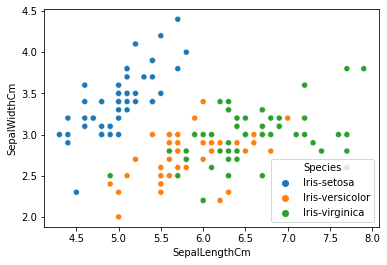

In [107]:
#Visualize the data prior to clustering
sb.scatterplot(data = iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species');

In [122]:
x_train = iris_df['SepalLengthCm'].values
#x_train = iris_df[['SepalLengthCm', 'SepalWidthCm']].values
x_data = iris_df[['SepalLengthCm', 'SepalWidthCm']]
train_x = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
x_test = iris_df['class_label'].values
print(x_train.shape)
print(train_x.shape)
print(x_test.shape)

(150,)
(150, 4)
(150,)


In [19]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=55):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [191]:
def cluster_data(x, y, x_data):
    colors = {0:'red', 1: 'green', 2: 'blue'}
    for i in range(1, 56):
        m = 'model' + str(i)
        l = 'label' + str(i)
        m = K_Means(max_iter=i)
        m.fit(x)
        l = get_clusters(m, y, x, i)
        

In [190]:
def get_clusters(model, y, x, i):
    colors = {0:'red', 1: 'green', 2: 'blue'}

    labels = []
    
    fig = plt.figure(figsize=(15,4))
    
    fig.add_subplot(121)
    for centroid in model.centroids:
        plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], model.centroids[centroid][2], color="k",marker="x", linewidths=10)
    for classification in model.classifications:
        c_color = colors[classification]
        for featureset in model.classifications[classification]:
            labels.append(classification)
            plt.scatter(featureset[0], featureset[1], featureset[2], color=c_color, linewidths=5)         
    plt.title(f"K-means Cluster: Iteration {i}")
    plt.xlabel("Sepal_Length")
    plt.ylabel("Sepal_Width") 
    
    fig.add_subplot(122)
    confusion_matrix = pd.crosstab(y, labels, rownames=['Actual'], colnames=['Predicted'])
    sb.heatmap(confusion_matrix, annot=True)
    plt.title('Confusion Matrix');
    
    plt.show();
        
    accuracy = model_accuracy(y, labels)
        
    print(f'Model prediction accuracy = {accuracy * 100:.2f}%')


In [175]:
def model_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

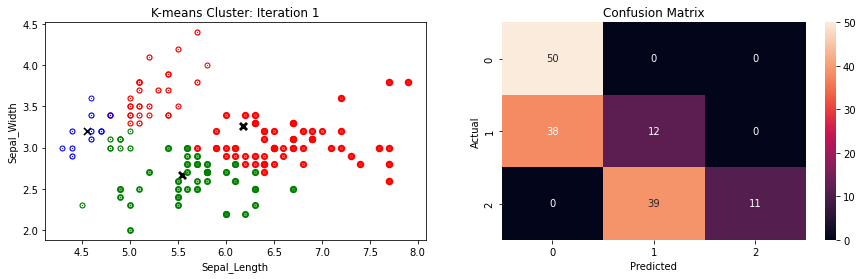

Model prediction accuracy = 48.67%


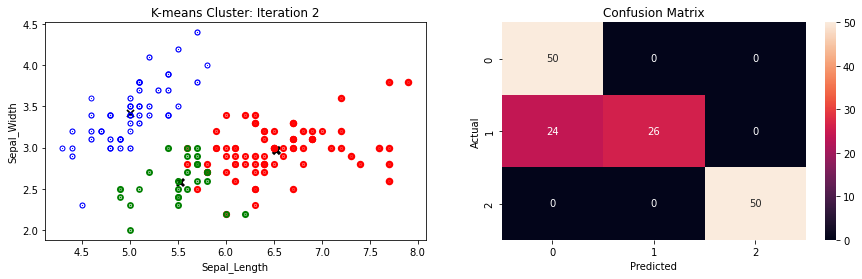

Model prediction accuracy = 84.00%


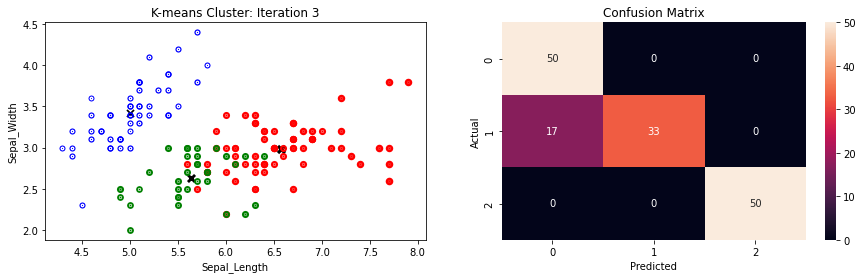

Model prediction accuracy = 88.67%


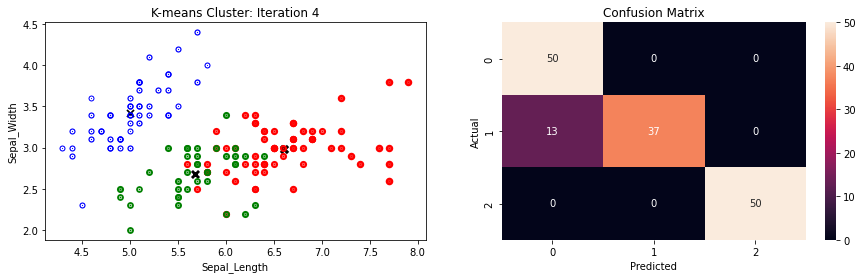

Model prediction accuracy = 91.33%


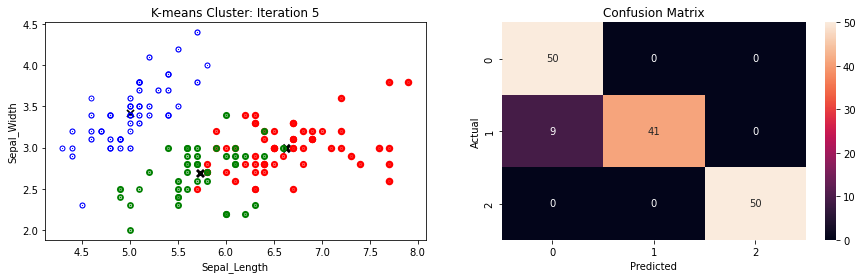

Model prediction accuracy = 94.00%


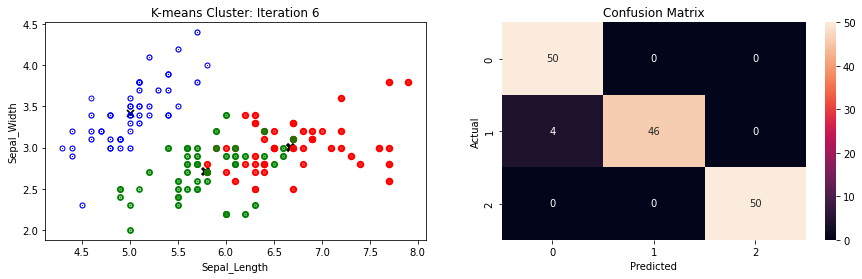

Model prediction accuracy = 97.33%


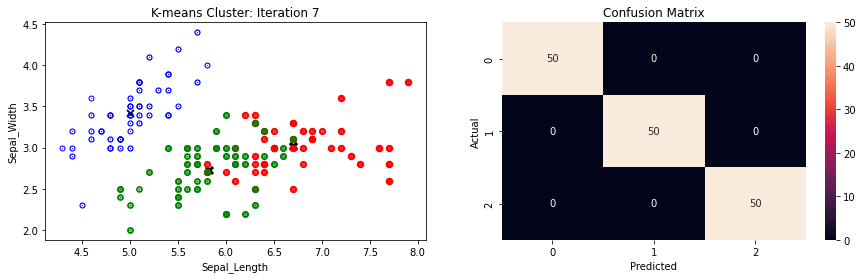

Model prediction accuracy = 100.00%


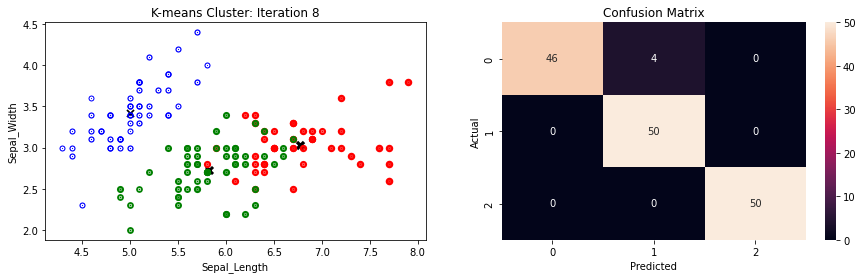

Model prediction accuracy = 97.33%


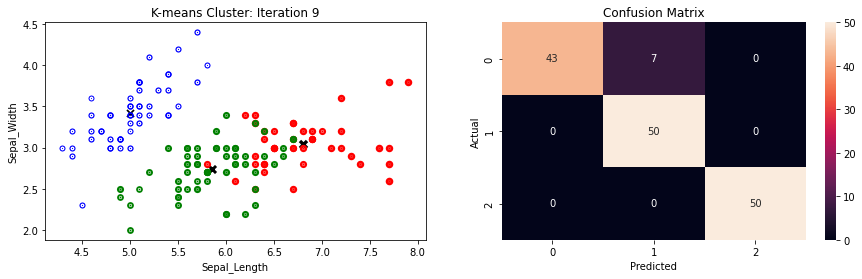

Model prediction accuracy = 95.33%


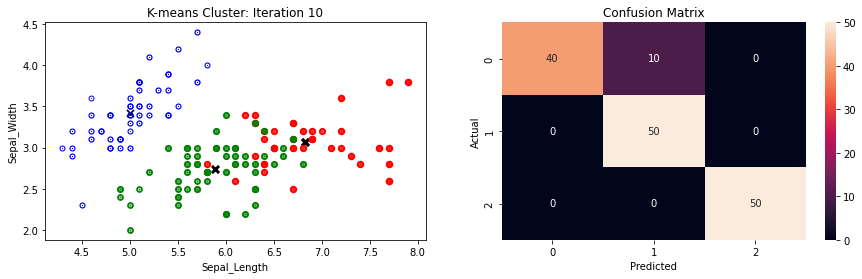

Model prediction accuracy = 93.33%


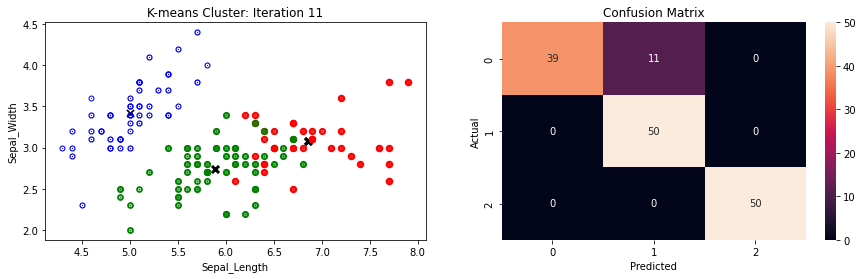

Model prediction accuracy = 92.67%


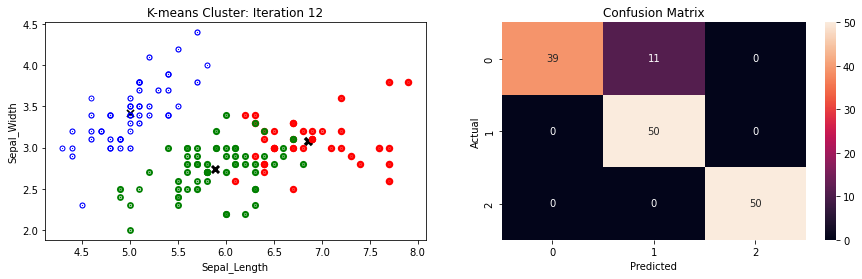

Model prediction accuracy = 92.67%


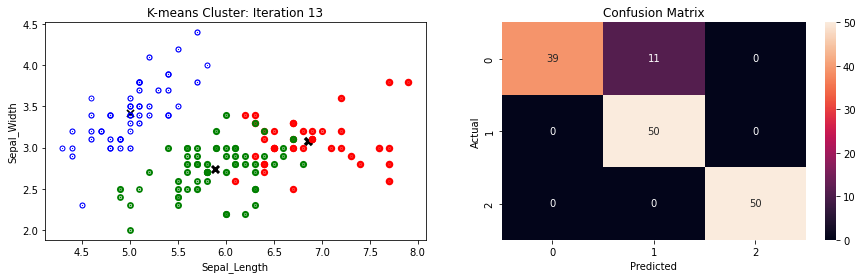

Model prediction accuracy = 92.67%


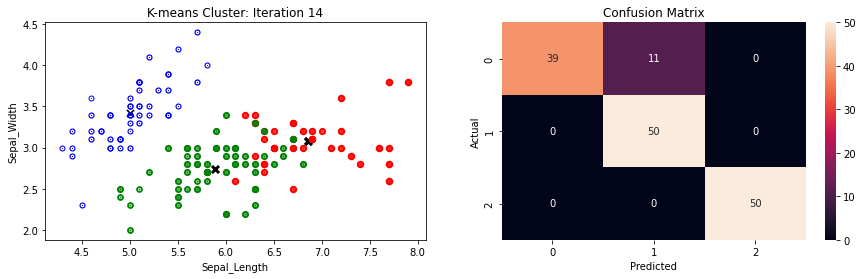

Model prediction accuracy = 92.67%


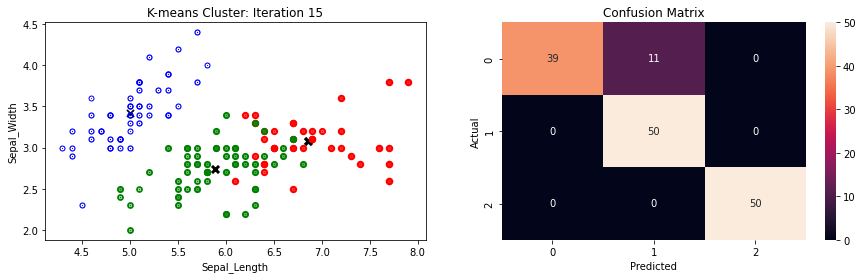

Model prediction accuracy = 92.67%


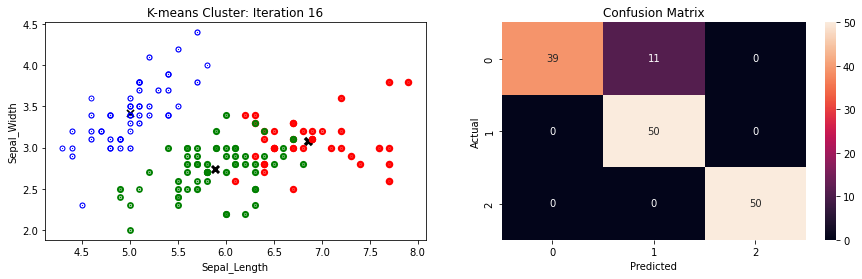

Model prediction accuracy = 92.67%


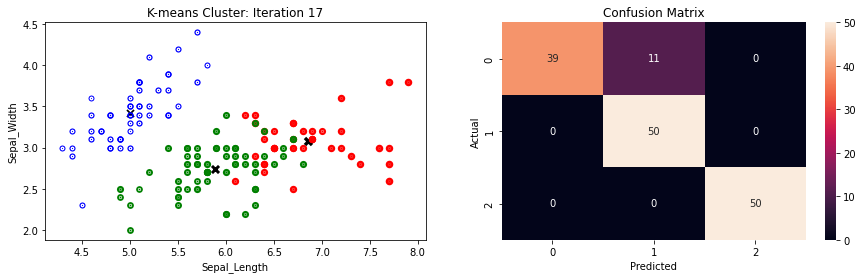

Model prediction accuracy = 92.67%


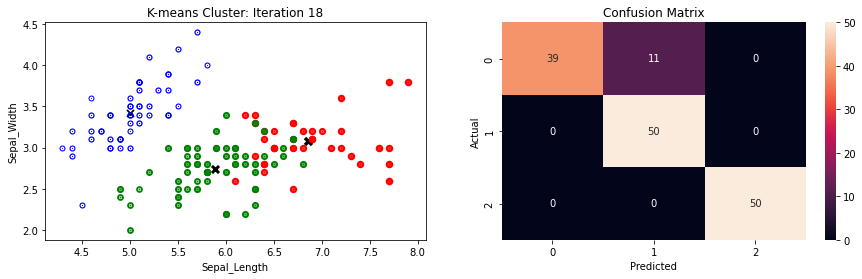

Model prediction accuracy = 92.67%


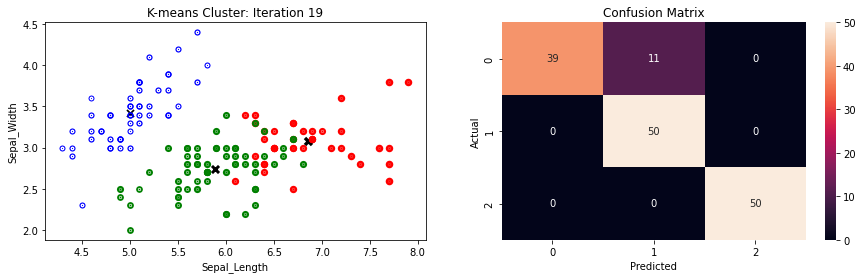

Model prediction accuracy = 92.67%


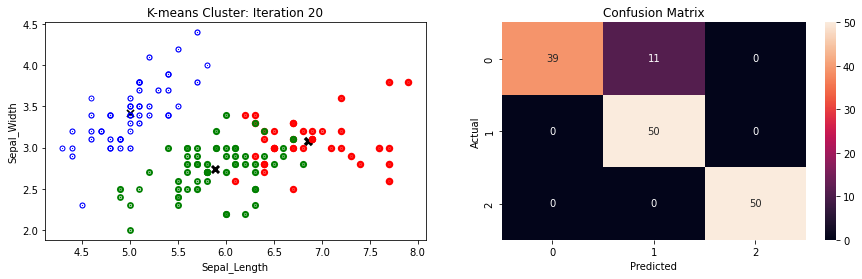

Model prediction accuracy = 92.67%


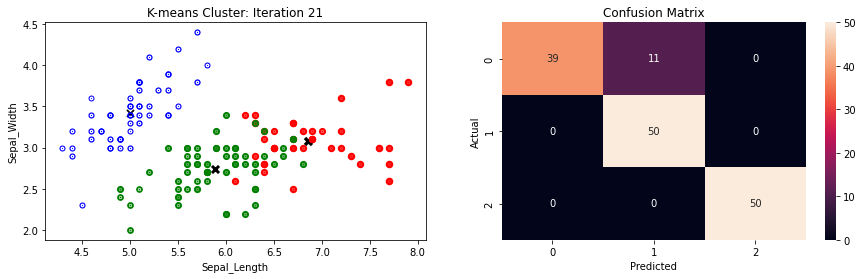

Model prediction accuracy = 92.67%


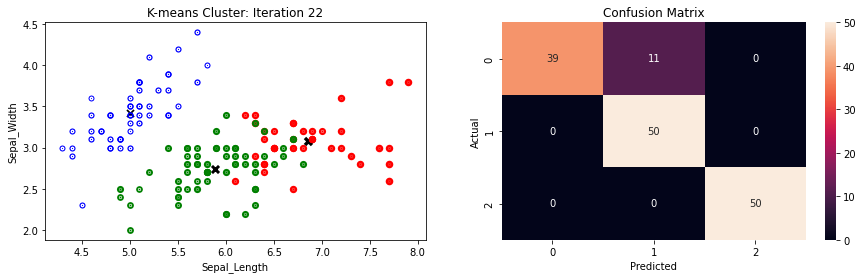

Model prediction accuracy = 92.67%


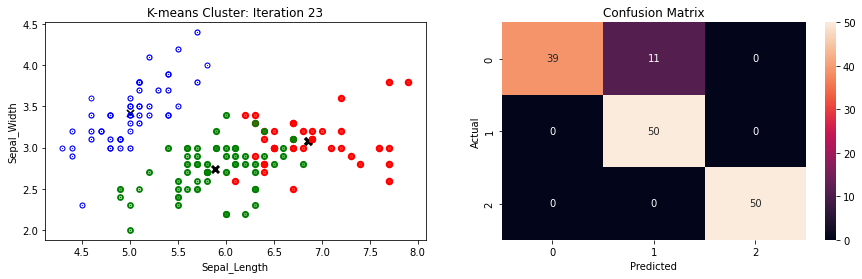

Model prediction accuracy = 92.67%


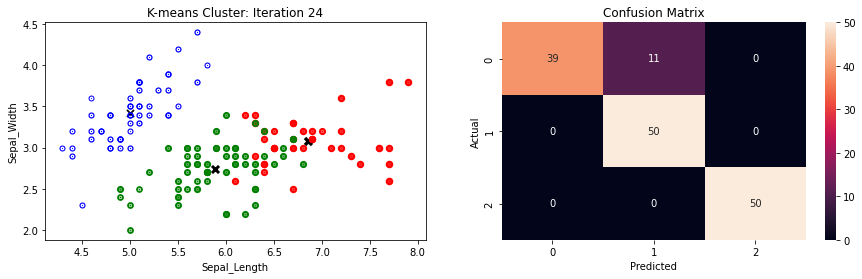

Model prediction accuracy = 92.67%


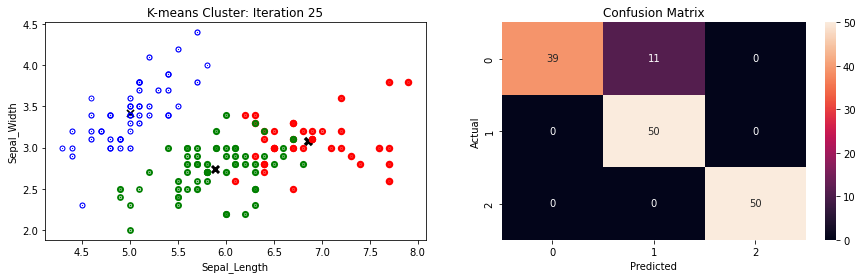

Model prediction accuracy = 92.67%


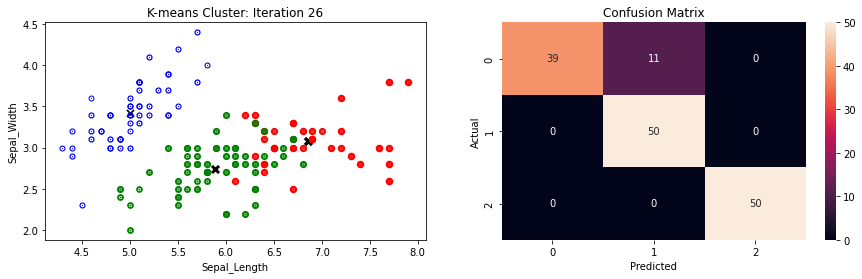

Model prediction accuracy = 92.67%


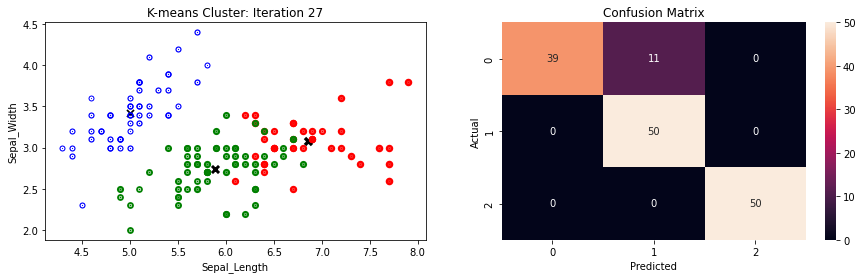

Model prediction accuracy = 92.67%


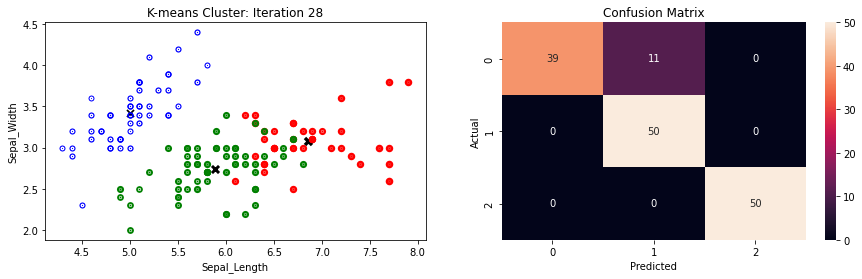

Model prediction accuracy = 92.67%


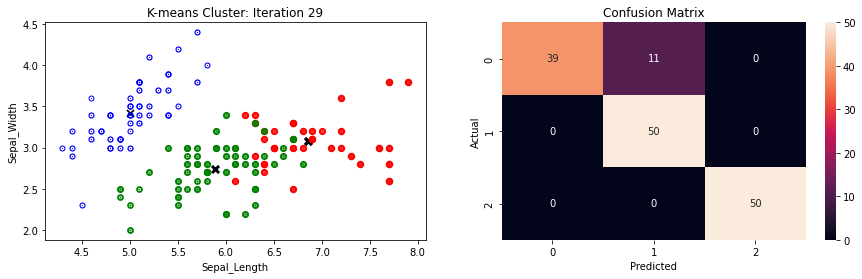

Model prediction accuracy = 92.67%


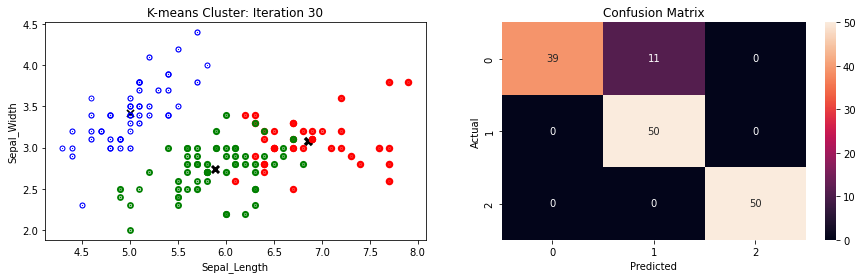

Model prediction accuracy = 92.67%


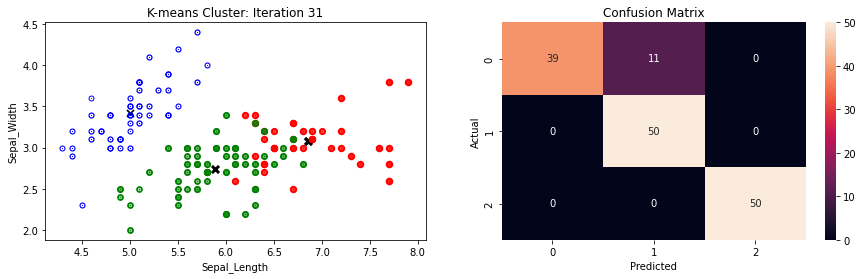

Model prediction accuracy = 92.67%


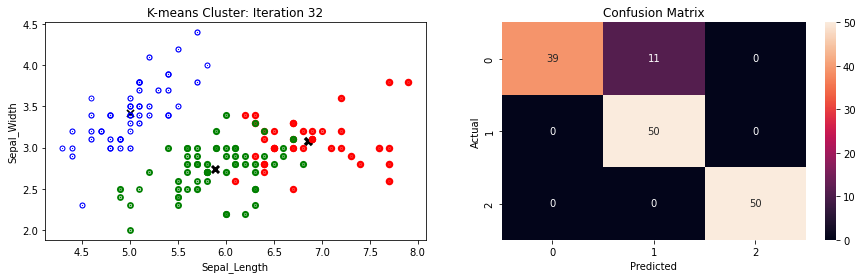

Model prediction accuracy = 92.67%


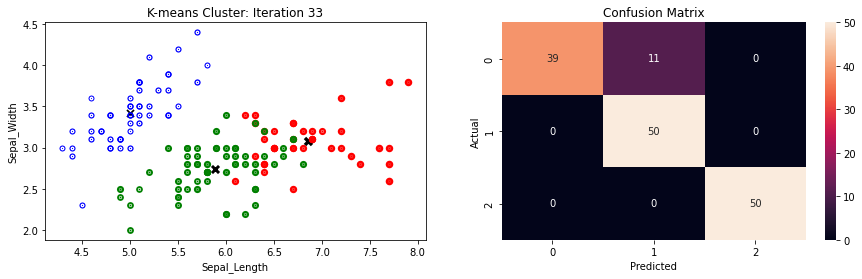

Model prediction accuracy = 92.67%


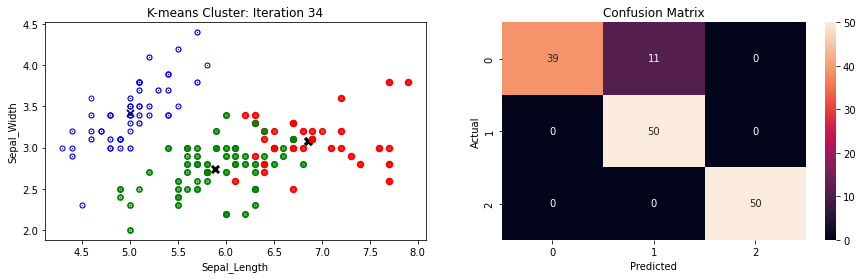

Model prediction accuracy = 92.67%


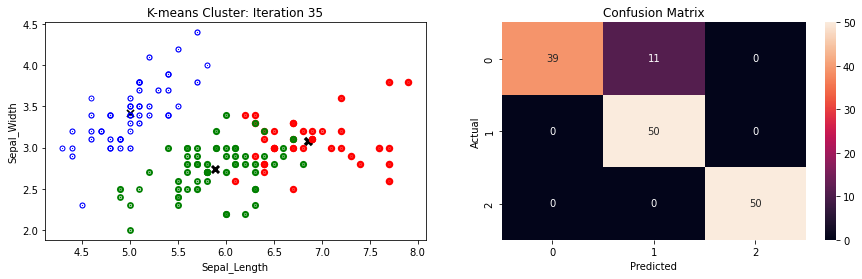

Model prediction accuracy = 92.67%


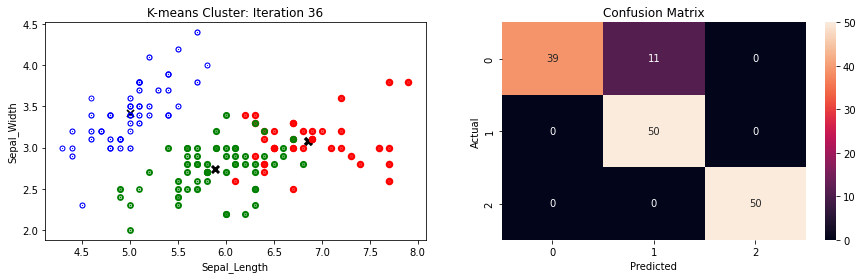

Model prediction accuracy = 92.67%


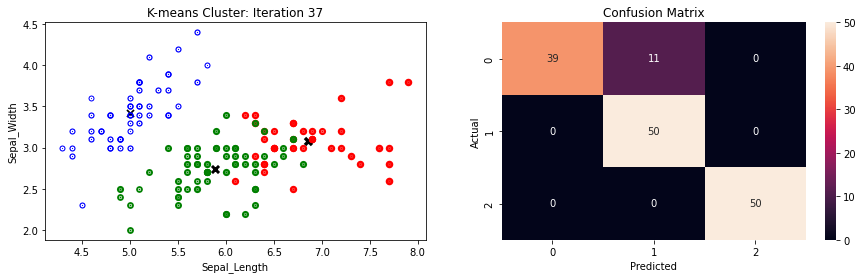

Model prediction accuracy = 92.67%


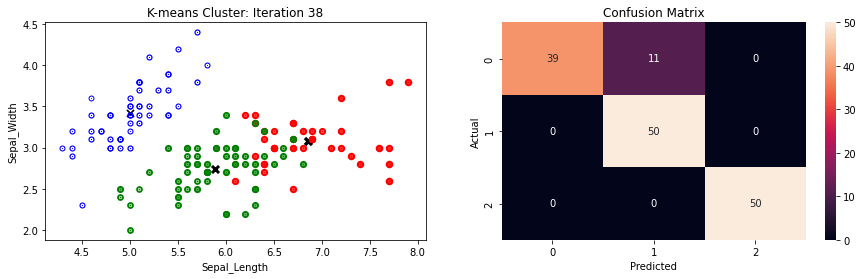

Model prediction accuracy = 92.67%


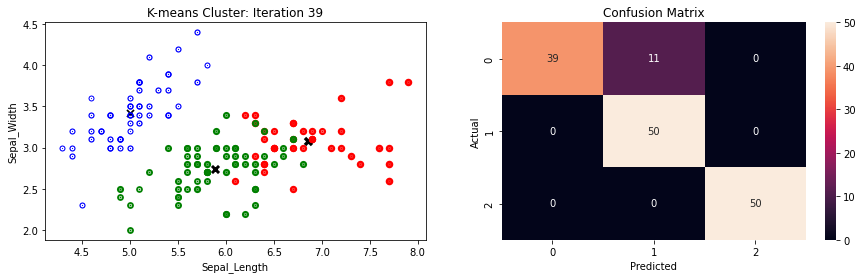

Model prediction accuracy = 92.67%


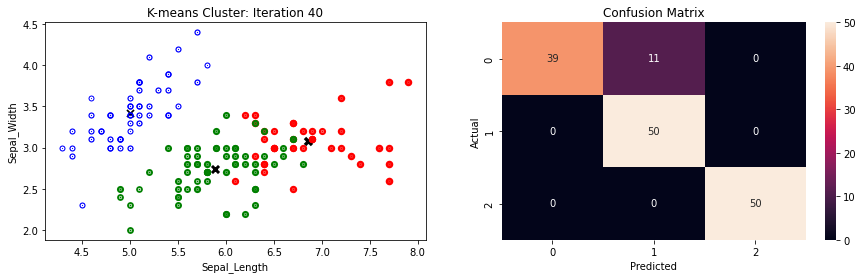

Model prediction accuracy = 92.67%


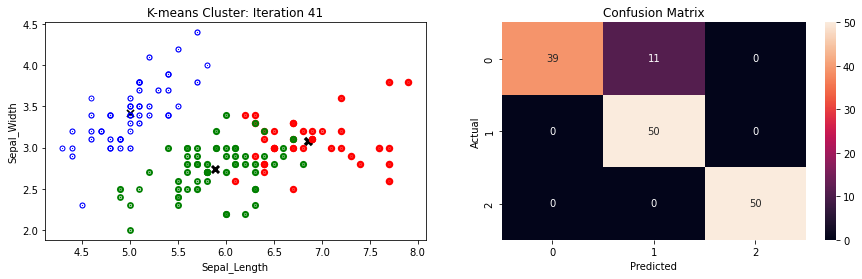

Model prediction accuracy = 92.67%


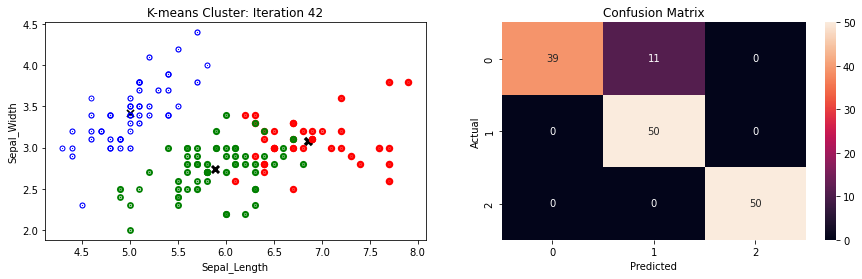

Model prediction accuracy = 92.67%


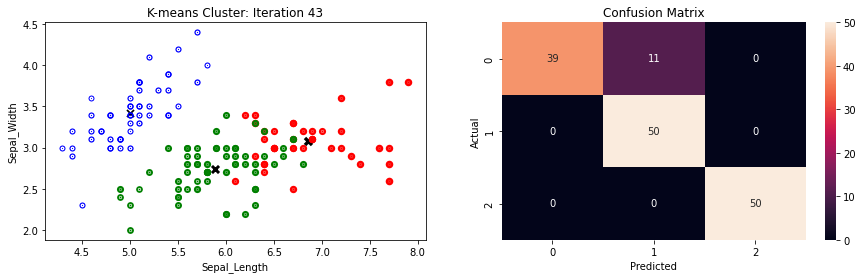

Model prediction accuracy = 92.67%


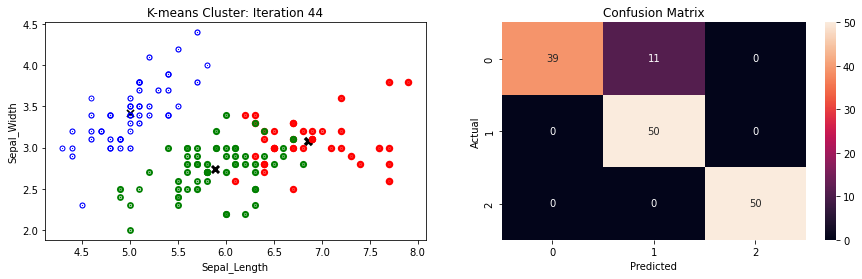

Model prediction accuracy = 92.67%


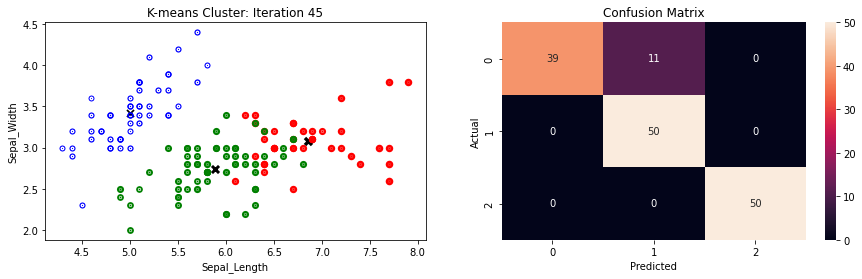

Model prediction accuracy = 92.67%


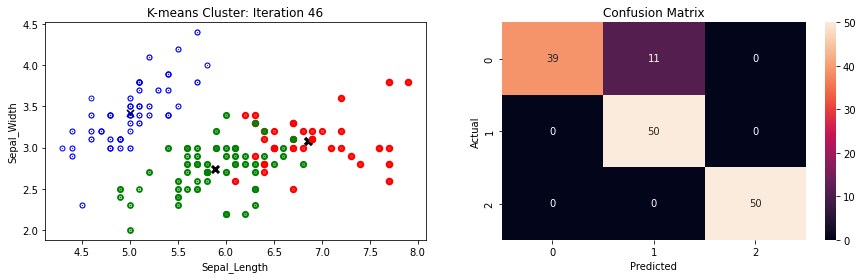

Model prediction accuracy = 92.67%


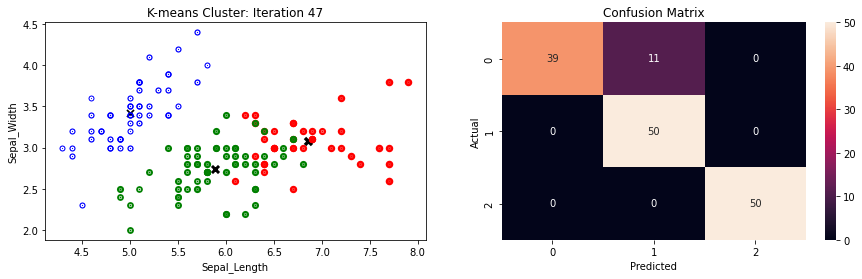

Model prediction accuracy = 92.67%


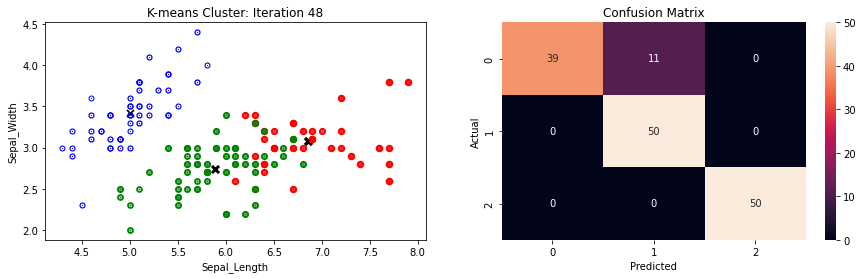

Model prediction accuracy = 92.67%


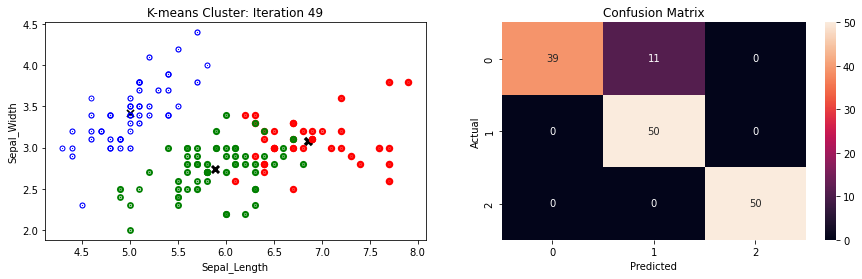

Model prediction accuracy = 92.67%


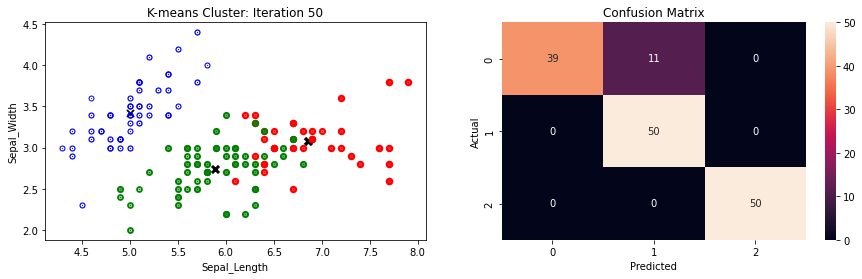

Model prediction accuracy = 92.67%


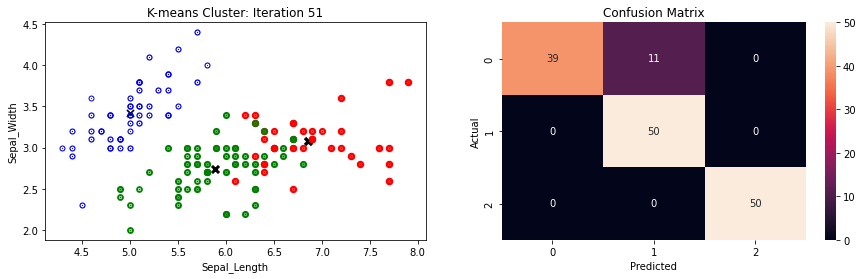

Model prediction accuracy = 92.67%


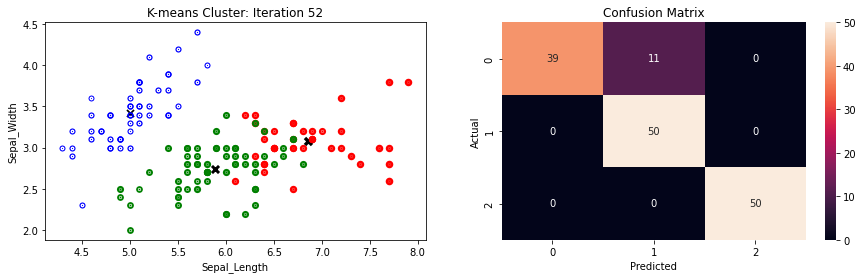

Model prediction accuracy = 92.67%


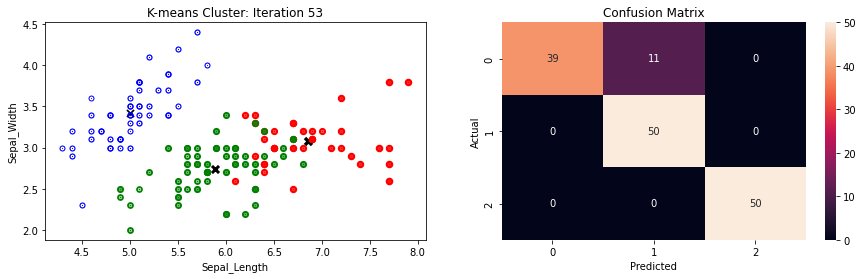

Model prediction accuracy = 92.67%


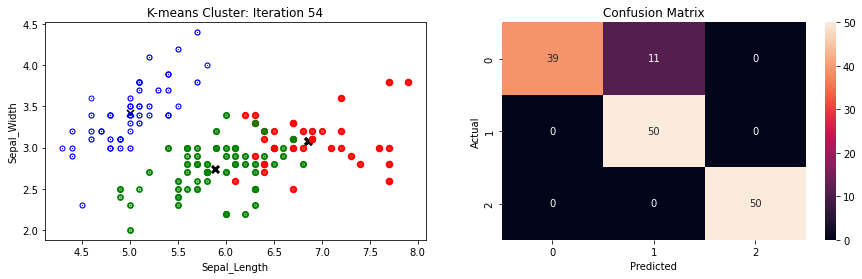

Model prediction accuracy = 92.67%


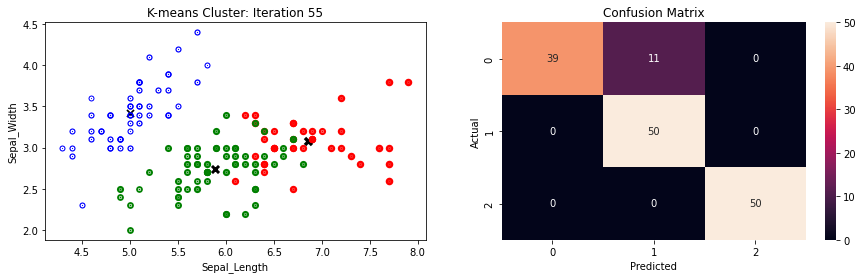

Model prediction accuracy = 92.67%


In [176]:
cluster_data(train_x, x_test, x_data)

#### References (Question 1) :
https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875

https://datascienceparichay.com/article/get-accuracy-of-predictions-in-python-with-sklearn/

## QUESTION 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [14]:
# defines the reward matrix
r = np.array([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]]).astype("float64")
q = np.zeros_like(r)

In [15]:
def update_q(state, next_state, action, alpha, gamma):
    r_sa = r[state, action]
    q_sa = q[state, action]
    new_q = q_sa + alpha * (r_sa + gamma * max(q[next_state, :]) - q_sa)
    q[state, action] = new_q
    # rescale to between 0 and 1
    rn = q[state][q[state] > 0]/ np.sum(q[state][q[state] > 0])
    q[state][q[state] > 0] = rn
    return r[state, action]

In [16]:
def show_path():
    # show all the paths
    for i in range(len(q)):
        current_state = i
        path = "%i -> " % current_state
        n_steps = 0
        while current_state != 5 and n_steps < 20:
            next_state = np.argmax(q[current_state])
            current_state = next_state
            path += "%i -> " % current_state
            n_steps = n_steps + 1
        # cut off final arrow
        path = path[:-4]
        print("Optimal Path for starting state %i" % i)
        print(path)
        print("")



# hyperparameters
gamma = 0.3 #vary this between 0 and 1 i.e., (0,1)
alpha = 0.2 #vary this between 0 and 1 inclusive, i.e., [0,1]
n_episodes = 1E3 #try different values, e.g., 10, 500, 10000 and so forth
epsilon = 0.05 #you can experiment with this as well

n_states = 6
n_actions = 6

random_state = np.random.RandomState(10) #you may try without seed value and other seed values

for e in range(int(n_episodes)):
    states = list(range(n_states))
    random_state.shuffle(states)
    current_state = states[0]
    goal = False
    if e % int(n_episodes / 10.) == 0 and e > 0:
        pass
    while not goal:
        # epsilon greedy
        valid_moves = r[current_state] >= 0
        if random_state.rand() < epsilon:
            actions = np.array(list(range(n_actions)))
            actions = actions[valid_moves == True]
            if type(actions) is int:
                actions = [actions]
            random_state.shuffle(actions)
            action = actions[0]
            next_state = action
        else:
            if np.sum(q[current_state]) > 0:
                action = np.argmax(q[current_state])
            else:
                # Don't allow invalid moves at the start
                # Just take a random move
                actions = np.array(list(range(n_actions)))
                actions = actions[valid_moves == True]
                random_state.shuffle(actions)
                action = actions[0]
            next_state = action
        reward = update_q(current_state, next_state, action,
                          alpha=alpha, gamma=gamma)
        # Goal due to  rescaling
        if reward > 1:
            goal = True
        current_state = next_state
print ("Q Table") 
print(q)


Q Table
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.22693405e-101
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 3.31372544e-001 3.35429718e-001 0.00000000e+000
  3.33197738e-001 0.00000000e+000]
 [8.01544664e-113 0.00000000e+000 0.00000000e+000 1.12907938e-073
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 7.43140788e-076 0.00000000e+000 0.00000000e+000
  8.84806999e-117 1.00000000e+000]]


In [17]:
show_path()

Optimal Path for starting state 0
0 -> 4 -> 5

Optimal Path for starting state 1
1 -> 5

Optimal Path for starting state 2
2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2

Optimal Path for starting state 3
3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3

Optimal Path for starting state 4
4 -> 5

Optimal Path for starting state 5
5



In [18]:
#Original Output

'''
# hyperparameters
gamma = 0.8 #vary this between 0 and 1 i.e., (0,1)
alpha = 0.9 #vary this between 0 and 1 inclusive, i.e., [0,1]
n_episodes = 1E3 #try different values, e.g., 10, 500, 10000 and so forth
epsilon = 0.05 #you can experiment with this as well
Optimal Path for starting state 0

0 -> 4 -> 5

Optimal Path for starting state 1
1 -> 5

Optimal Path for starting state 2
2 -> 3 -> 1 -> 5

Optimal Path for starting state 3
3 -> 1 -> 5

Optimal Path for starting state 4
4 -> 5

Optimal Path for starting state 5
5
'''

'\n# hyperparameters\ngamma = 0.8 #vary this between 0 and 1 i.e., (0,1)\nalpha = 0.9 #vary this between 0 and 1 inclusive, i.e., [0,1]\nn_episodes = 1E3 #try different values, e.g., 10, 500, 10000 and so forth\nepsilon = 0.05 #you can experiment with this as well\nOptimal Path for starting state 0\n\n0 -> 4 -> 5\n\nOptimal Path for starting state 1\n1 -> 5\n\nOptimal Path for starting state 2\n2 -> 3 -> 1 -> 5\n\nOptimal Path for starting state 3\n3 -> 1 -> 5\n\nOptimal Path for starting state 4\n4 -> 5\n\nOptimal Path for starting state 5\n5\n'

#### Observation

Having altered the gamma and alpha hyper parameters from their original values as shown above to 0.3 and 0.2 respectively, 
the optimal path for (2) and (3) to having 20 steps each. This is obviously sub optimal.